# Notebook to do quick tests of MJCF XML files obtained from Blender

Want to have a workflow where I can set up scenes in Blender and then export these to Mujoco. Currently testing tools from Github that should let one do this automatically.

To test these tools, recreating some of the most basic demos from the deepmind google colab tutorial on mujoco

### Imports

In [5]:
import os
import mujoco

import mediapy as media
import matplotlib.pyplot as plt

In [6]:
# import mujoco_viewer

### Load xml file for first demo

In [7]:
# get path info for xml file we want to test
xml_path = '/home/sam/Documents/code/wing-hinge-mujoco/blender_files'
xml_fn = 'basic_demo0'

# NB: folder and xml filename should be the same
xml_path_full = os.path.join(xml_path, xml_fn, '%s.xml'%(xml_fn))

In [8]:
# load model
model = mujoco.MjModel.from_xml_path(xml_path_full)

### Quick checks of model props

In [9]:
# number of objects?
model.ngeom

2

In [10]:
# object colors
model.geom_rgba

array([[1.        , 0.        , 0.0018755 , 1.        ],
       [0.        , 1.        , 0.00292803, 1.        ]], dtype=float32)

In [11]:
# # object properties
# try:
#     print(model.geom('green_sphere geom'))
# except KeyError:
#     print(model.geom('green_sphere'))

### Get mjData (model data)

In [12]:
data = mujoco.MjData(model)

In [13]:
print(data.geom_xpos)

[[0. 0. 0.]
 [0. 0. 0.]]


In [14]:
mujoco.mj_kinematics(model, data)
print('raw access:\n', data.geom_xpos)


raw access:
 [[0.         0.         0.        ]
 [1.33205577 0.91240949 1.88877475]]


### Visualize

In [15]:
# Make model and data
model = mujoco.MjModel.from_xml_path(xml_path_full)
data = mujoco.MjData(model)

# Make renderer, 
if 'renderer' in locals():
    del renderer
    
renderer = mujoco.Renderer(model)


""

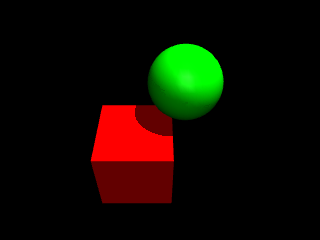

In [16]:
# render and show the pixels
# NB: if I redefine the renderer here, it doesn't work!
mujoco.mj_forward(model, data)
renderer.update_scene(data)

media.show_image(renderer.render())

### Test animation using second demo 

In [17]:
# load second demo
xml_path = '/home/sam/Documents/code/wing-hinge-mujoco/blender_files'
xml_fn = 'basic_demo1'

# NB: folder and xml filename should be the same
xml_path_full = os.path.join(xml_path, xml_fn, '%s.xml'%(xml_fn))

In [18]:
# generate model and data
model = mujoco.MjModel.from_xml_path(xml_path_full)
data = mujoco.MjData(model)

if 'renderer' in locals():
    del renderer
renderer = mujoco.Renderer(model)

# enable joint visualization option:
scene_option = mujoco.MjvOption()
scene_option.flags[mujoco.mjtVisFlag.mjVIS_JOINT] = True

duration = 3.8  # (seconds)
framerate = 60  # (Hz)

frames = []
mujoco.mj_resetData(model, data)
while data.time < duration:
  mujoco.mj_step(model, data)
  if len(frames) < data.time * framerate:
    renderer.update_scene(data, scene_option=scene_option)
    pixels = renderer.render()
    frames.append(pixels)

# Simulate and display video.
media.show_video(frames, fps=framerate)